# The Sparks Foundation - Exploratory Data Analysis - Terrorism
Task - Perform ‘Exploratory Data Analysis’ on dataset ‘globalterrorism’.

Author - Rubal Bansal

### Import Libraries
Importing all libraries required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### The Data
Reading data in the globalterrorism.csv file into a pandas dataframe.

In [2]:
df = pd.read_csv('globalterrorism.csv', encoding='latin1')
print("Data imported")

df.head()

C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Data imported


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#### Filtering particular columns in whole dataset

In [3]:
df=df[['iyear', 'imonth', 'iday','extended', 'country_txt', 
       'region_txt', 'city', 'success', 'suicide','nwound','nkill',
       'targtype1_txt', 'gname', 'weaptype1_txt']]

#### Rename columns

In [4]:
df.rename(columns={'iyear': 'year', 'imonth': 'month', 'iday':'day', 'country_txt':'country','attacktype1_txt':'attactype','nwound':'wound','nkill':'killed',
                  'region_txt':'region', 'targtype1_txt':'target', 'gname':'group', 'weaptype1_txt':'weapon'}, inplace=True)
df.head()

,year,month,day,extended,country,region,city,success,suicide,wound,killed,target,group,weapon
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,0.0,1.0,Private Citizens & Property,MANO-D,Unknown
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,0.0,0.0,Government (Diplomatic),23rd of September Communist League,Unknown
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,0.0,1.0,Journalists & Media,Unknown,Unknown
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,NaN,NaN,Government (Diplomatic),Unknown,Explosives
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,NaN,NaN,Government (Diplomatic),Unknown,Incendiary


In [5]:
df.shape

(181691, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   year      181691 non-null  int64  
 1   month     181691 non-null  int64  
 2   day       181691 non-null  int64  
 3   extended  181691 non-null  int64  
 4   country   181691 non-null  object 
 5   region    181691 non-null  object 
 6   city      181257 non-null  object 
 7   success   181691 non-null  int64  
 8   suicide   181691 non-null  int64  
 9   wound     165380 non-null  float64
 10  killed    171378 non-null  float64
 11  target    181691 non-null  object 
 12  group     181691 non-null  object 
 13  weapon    181691 non-null  object 
dtypes: float64(2), int64(6), object(6)
memory usage: 19.4+ MB


In [7]:
df.describe()

,year,month,day,extended,success,suicide,wound,killed
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,165380.000000,171378.000000
mean,2002.638997,6.467277,15.505644,0.045346,0.889598,0.036507,3.167668,2.403272
std,13.259430,3.388303,8.814045,0.208063,0.313391,0.187549,35.949392,11.545741
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,1.000000,0.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000,8191.000000,1570.000000


In [8]:
df.columns

Index(['year', 'month', 'day', 'extended', 'country', 'region', 'city',
       'success', 'suicide', 'wound', 'killed', 'target', 'group', 'weapon'],
      dtype='object')

In [9]:
df.corr()

,year,month,day,extended,success,suicide,wound,killed
year,1.000000,0.000139,0.018254,0.091754,-0.082963,0.137736,0.015273,0.015341
month,0.000139,1.000000,0.005497,-0.000468,-0.002845,0.003071,0.002938,0.003463
day,0.018254,0.005497,1.000000,-0.004700,-0.011802,0.003593,-0.001268,-0.003693
extended,0.091754,-0.000468,-0.004700,1.000000,0.073233,-0.033961,-0.006627,0.027737
success,-0.082963,-0.002845,-0.011802,0.073233,1.000000,-0.031155,0.025804,0.053115
suicide,0.137736,0.003071,0.003593,-0.033961,-0.031155,1.000000,0.099525,0.136086
wound,0.015273,0.002938,-0.001268,-0.006627,0.025804,0.099525,1.000000,0.534375
killed,0.015341,0.003463,-0.003693,0.027737,0.053115,0.136086,0.534375,1.000000


## Exploratory Data Analysis
Let's begin some exploratory data analysis! Let's start by checking out missing data!

### Missing Data
Seaborn can used to create a simple heatmap to see where we are missing data!

In [10]:
df.isnull().sum()

year            0
month           0
day             0
extended        0
country         0
region          0
city          434
success         0
suicide         0
wound       16311
killed      10313
target          0
group           0
weapon          0
dtype: int64

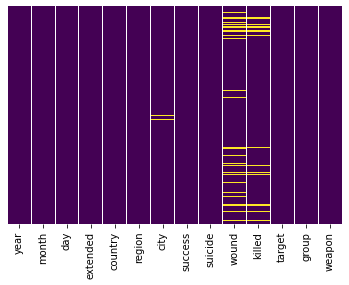

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Data Cleaning
We have a big dataset, so we'll just drop the missing data.

In [12]:
df.dropna(axis=0, inplace=True)

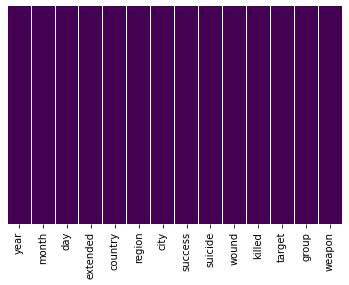

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Multivariate Visualizations

In [14]:
df.corr()

,year,month,day,extended,success,suicide,wound,killed
year,1.000000,-0.003650,0.018501,0.035569,-0.074609,0.135626,0.015506,0.003137
month,-0.003650,1.000000,0.005784,0.000581,0.000077,0.001429,0.002905,0.004060
day,0.018501,0.005784,1.000000,-0.002065,-0.011340,0.002486,-0.001296,-0.000829
extended,0.035569,0.000581,-0.002065,1.000000,0.063475,-0.031525,-0.006657,0.005074
success,-0.074609,0.000077,-0.011340,0.063475,1.000000,-0.027845,0.025865,0.057091
suicide,0.135626,0.001429,0.002486,-0.031525,-0.027845,1.000000,0.099657,0.152038
wound,0.015506,0.002905,-0.001296,-0.006657,0.025865,0.099657,1.000000,0.534388
killed,0.003137,0.004060,-0.000829,0.005074,0.057091,0.152038,0.534388,1.000000


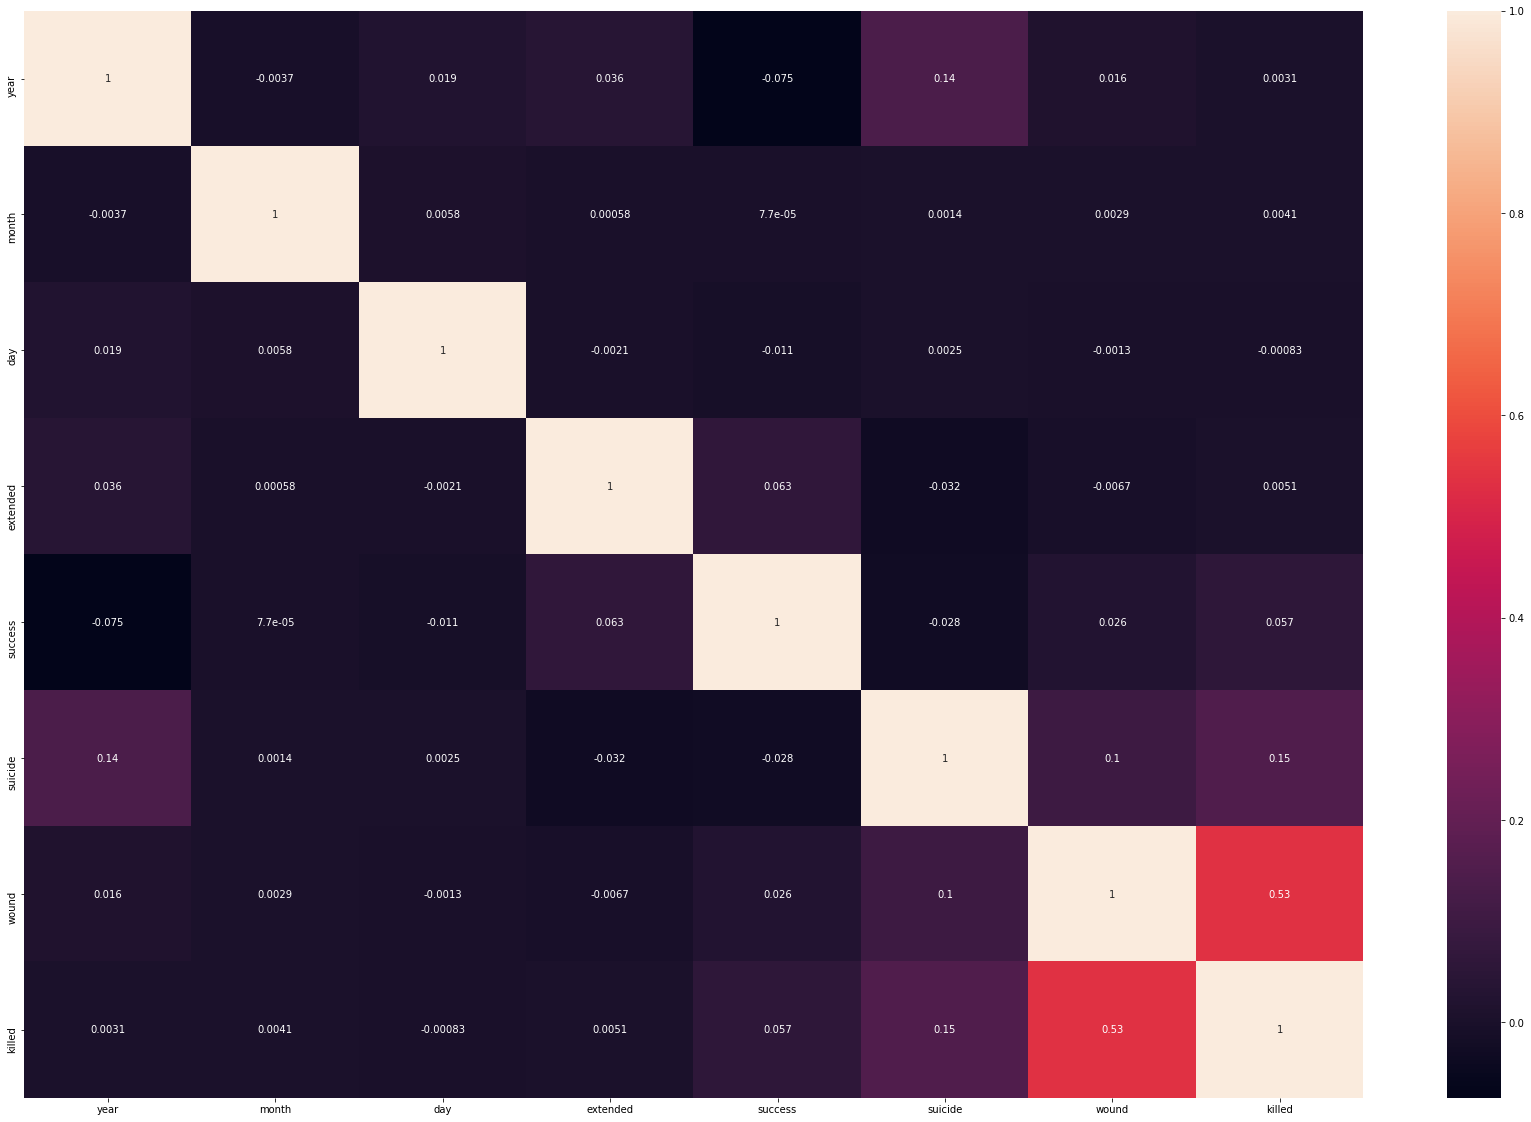

In [15]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)

### Number of Terrorist attack in year wise

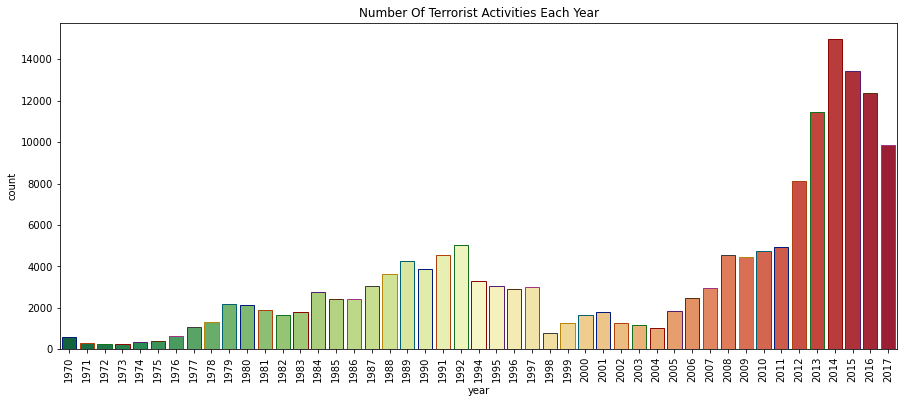

In [16]:
plt.subplots(figsize=(15,6))
sns.countplot('year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

In [17]:
df['Decade'] = pd.cut(df['year'], bins=[1969, 1980, 1990, 2000, 2010, 2020], labels=['1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2017'])
df[['year','Decade']].sample(10)

,year,Decade
39507,1989,1980-1990
3467,1975,1970-1980
163599,2016,2010-2017
92268,2009,2000-2010
110952,2012,2010-2017
152579,2015,2010-2017
966,1971,1970-1980
48985,1991,1990-2000
179130,2017,2010-2017
145383,2015,2010-2017


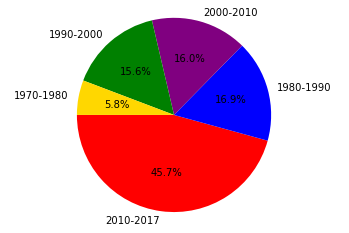

In [18]:
dec = df['Decade'].value_counts()

colors = 'red', 'blue', 'purple', 'green', 'gold'
plt.pie(dec, labels=dec.index, colors=colors, autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Incidents extended more than 24 hours or not')

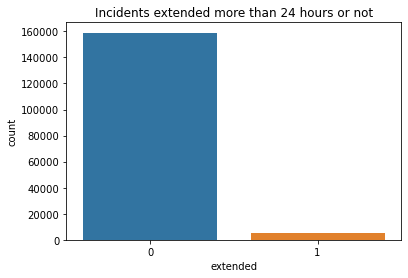

In [19]:
sns.countplot(df['extended'])
plt.title('Incidents extended more than 24 hours or not')

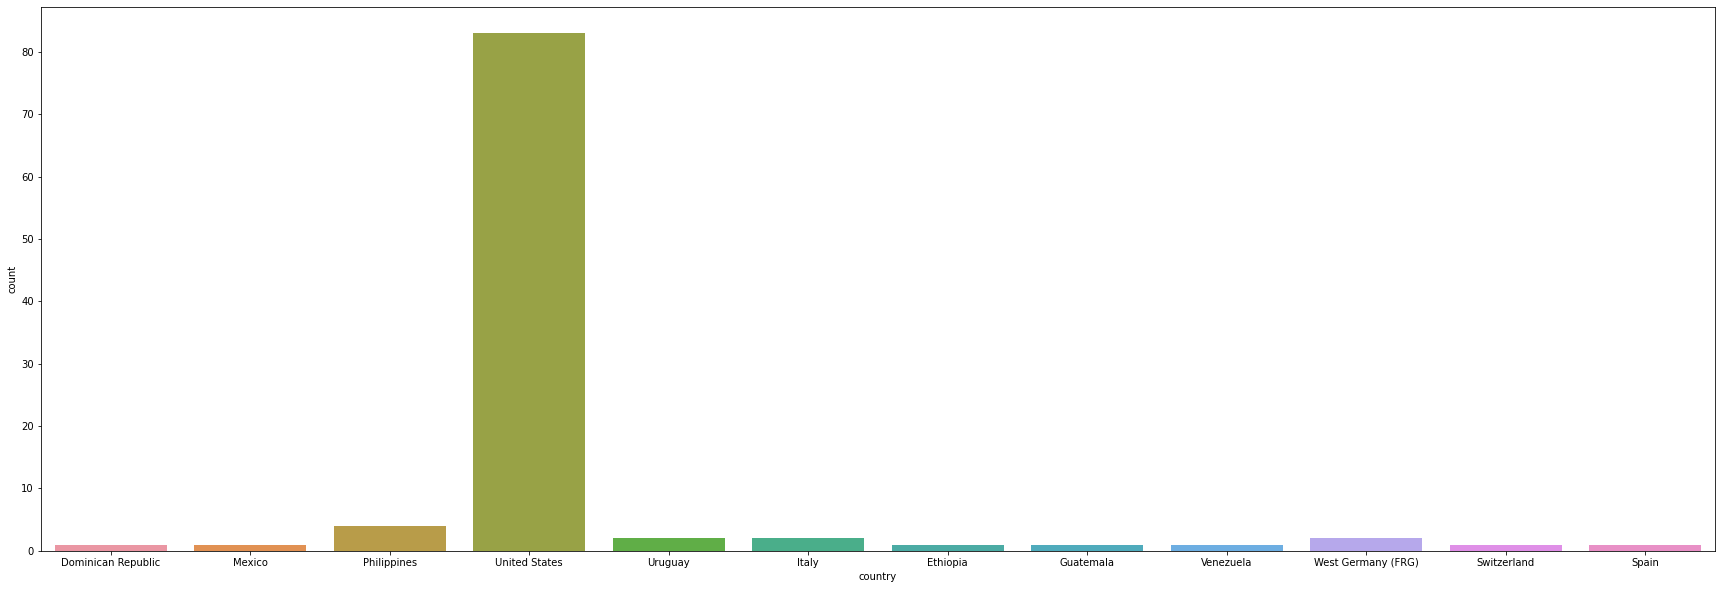

In [20]:
f = plt.figure(figsize=(30,10))
sns.countplot(df['country'].iloc[:100])

In [21]:
df['country'].value_counts()

Iraq                 23290
Pakistan             13860
Afghanistan          11813
India                11490
Colombia              7697
                     ...  
New Hebrides             1
Vatican City             1
Wallis and Futuna        1
South Vietnam            1
St. Lucia                1
Name: country, Length: 202, dtype: int64

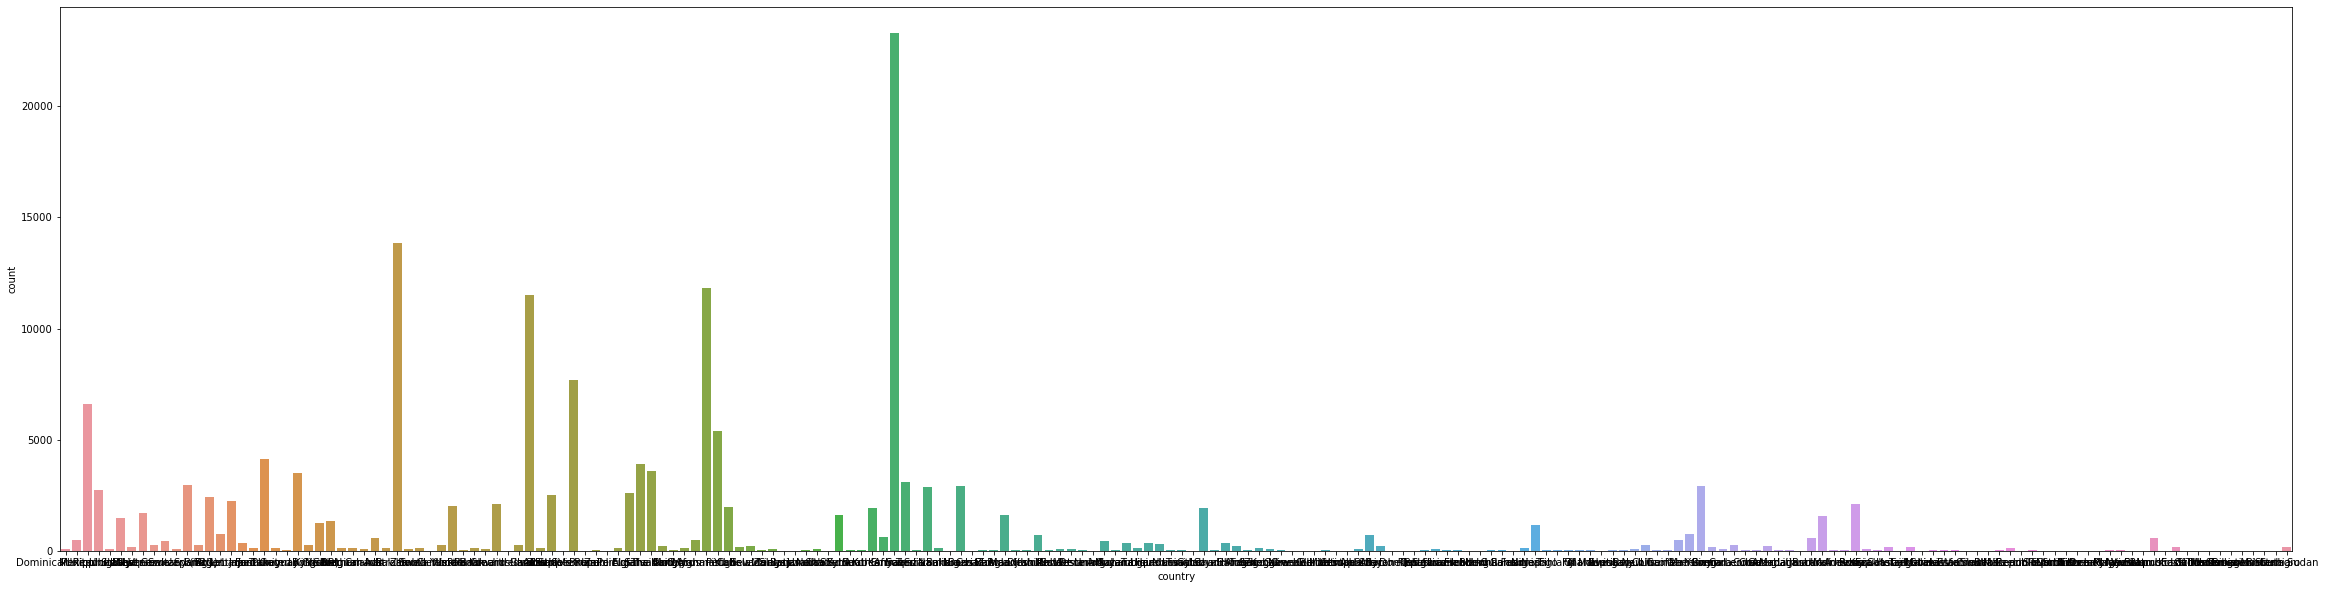

In [22]:
f = plt.figure(figsize=(40,10))
sns.countplot(df['country'][:181691])

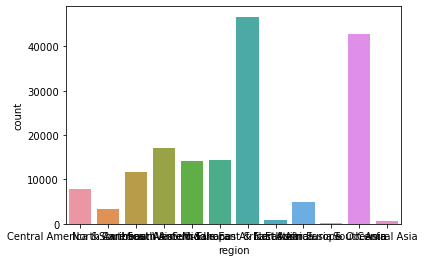

In [23]:
sns.countplot(df['region'])

### Number of attacks by terrorist group

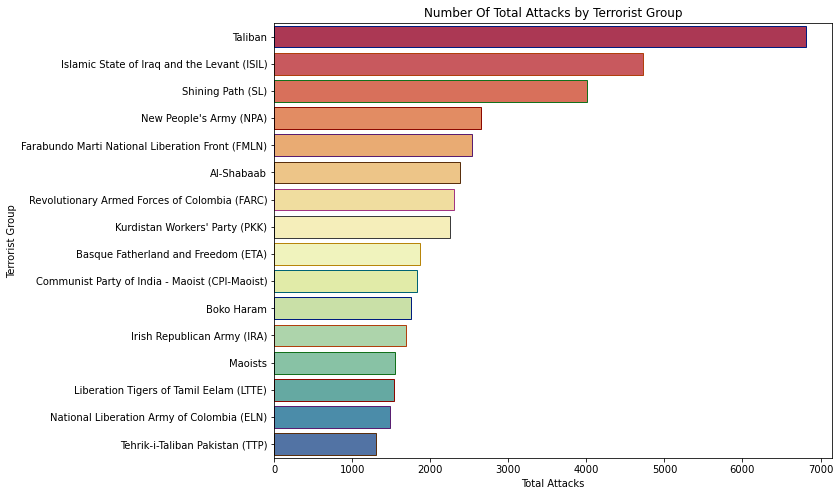

In [24]:
group_attacks = df.group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']
plt.subplots(figsize=(10,8))
sns.barplot(y=group_attacks['Terrorist Group'], x=group_attacks['Total Attacks'], palette='Spectral',
            edgecolor=sns.color_palette('dark', 10))
plt.title('Number Of Total Attacks by Terrorist Group')
plt.show()

### Top terrorist group activities

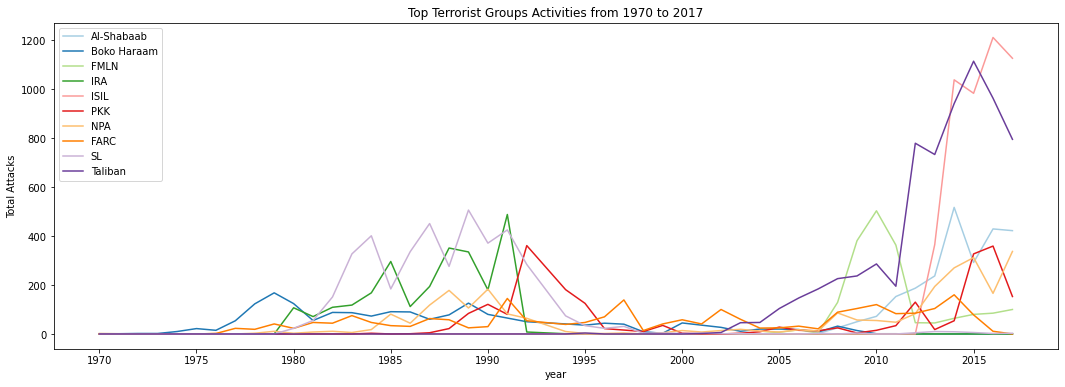

In [25]:
groups_10 = df[df.group.isin(df.group.value_counts()[1:11].index)]
pd.crosstab(groups_10.year, groups_10.group).plot(color=sns.color_palette('Paired', 10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(range(1970, 2017, 5))
plt.ylabel('Total Attacks')
plt.title('Top Terrorist Groups Activities from 1970 to 2017')
plt.legend(labels=['Al-Shabaab',
                   'Boko Haraam',
                   'FMLN',
                   'IRA',
                   'ISIL',
                   'PKK',
                   'NPA',
                   'FARC',
                   'SL',
                   'Taliban'], loc='upper left')
plt.show()

### Number of Terrorist attack by region wise

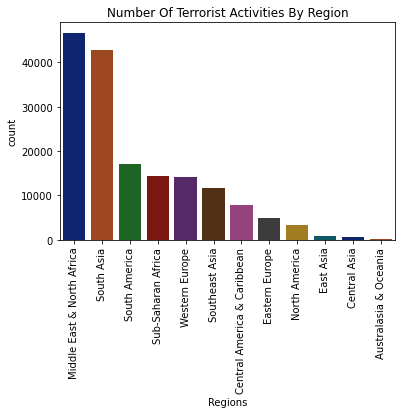

In [26]:
sns.countplot('region',data=df,palette='dark',order=df['region'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number Of Terrorist Activities By Region')
plt.show()

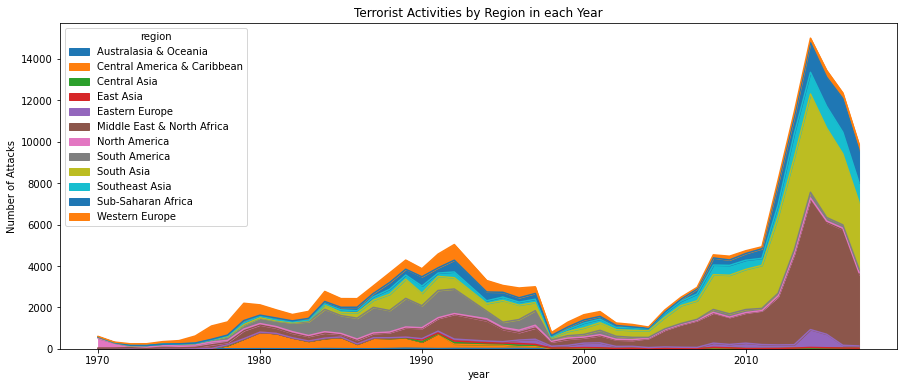

In [27]:
pd.crosstab(df.year, df.region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

Text(0, 0.5, 'Wounded')

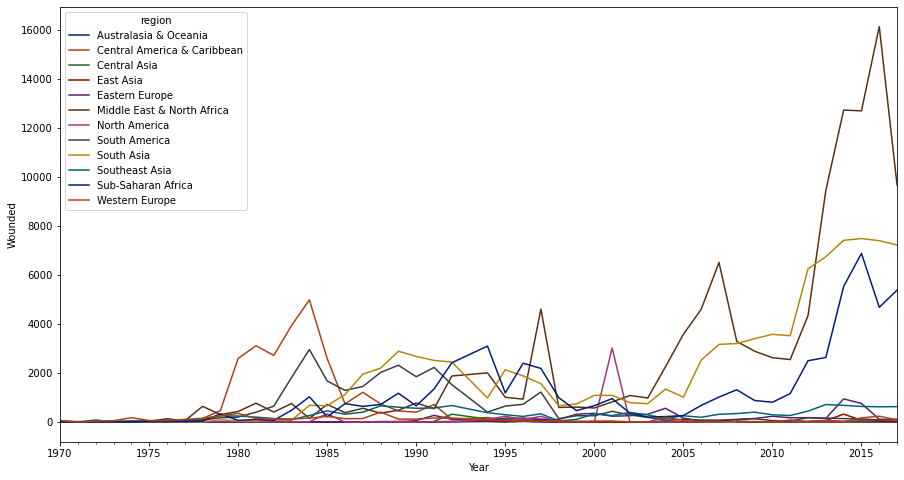

In [28]:
d=df.groupby(['year','region'])['killed'].sum()
plot_df = d.unstack('region').loc[:]
plot_df.index = pd.PeriodIndex(plot_df.index.tolist(),freq='A')
plot_df.plot(figsize=(15,8),color=sns.color_palette('dark',12))
plt.xlabel("Year")
plt.ylabel("Wounded")

### Which cities attack most time

In [29]:
def city_name(country=list(df['country'].unique())):
    a=df[df['country']==country]
    a=pd.DataFrame(a['city'].value_counts().iloc[1:10])
    return a.style.highlight_max(axis=0, color='red').highlight_min(axis=0, color='green')

In [30]:
city_name(df['country'])

,city
Baghdad,7374
Karachi,2571
Lima,2124
Mosul,2114
Mogadishu,1375
Santiago,1354
Belfast,1328
San Salvador,1254
Istanbul,1011


### Weapons used by terrorist

In [31]:
def weapon_type(country=list(df['country'].unique())):
    a=df[df['country']==country]
    a=pd.DataFrame(a['weapon'].value_counts())
    return a.style.highlight_max(axis=0)

In [32]:
weapon_type(df['country'])

,weapon
Explosives,86231
Firearms,51645
Unknown,12083
Incendiary,10285
Melee,3381
Chemical,302
Sabotage Equipment,136
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",133
Other,109
Fake Weapons,33


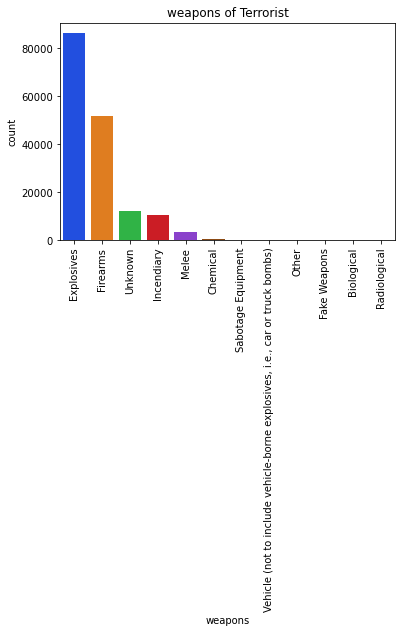

In [33]:
sns.countplot('weapon',data=df,palette='bright',order=df['weapon'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('weapons')
plt.title('weapons of Terrorist')
plt.show()

### Target of Terrorist

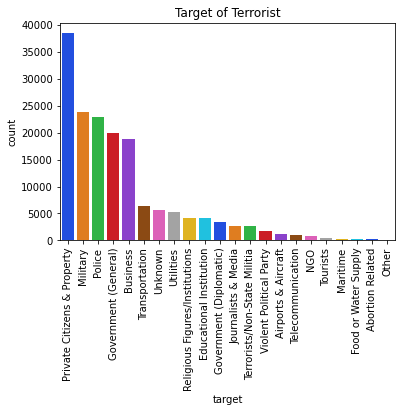

In [34]:
sns.countplot('target',data=df,palette='bright',order=df['target'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('target')
plt.title('Target of Terrorist')
plt.show()

### Total Number of people killed in terror attack

In [35]:
killData = df.loc[:,'killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 350700


### Countrydata

In [36]:
countryData = df.loc[:,'country']
countryKillData = pd.concat([countryData, killData], axis=1)
countryKillFormatData = countryKillData.pivot_table(columns='country', values='killed', aggfunc='sum')
countryKillFormatData

country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
killed,35767.0,42.0,10141.0,2459.0,398.0,29.0,23.0,30.0,256.0,1.0,...,1.0,0.0,1449.0,79.0,1.0,7011.0,115.0,296.0,70.0,154.0


### Number of people killed by countries

In [37]:
df['casualities'] = df.killed + df.wound

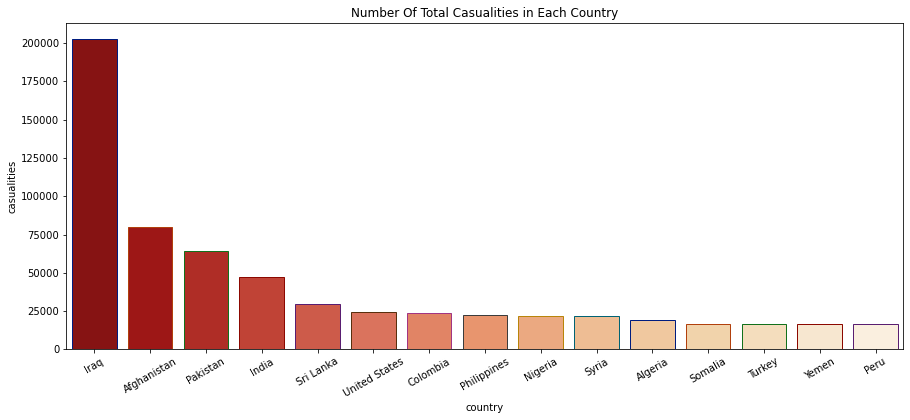

In [38]:
plt.subplots(figsize=(15,6))
count_cas = df.groupby('country').casualities.sum().to_frame().reset_index().sort_values('casualities', ascending=False)[:15]
sns.barplot(x=count_cas.country, y=count_cas.casualities, palette= 'OrRd_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number Of Total Casualities in Each Country')
plt.show()

### Percentage of success and failure attacks

In [39]:
suc = df['success'].value_counts()
suc

1    145013
0     19371
Name: success, dtype: int64

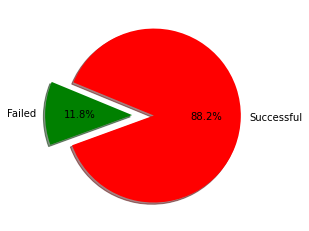

In [40]:
labels = 'Successful', 'Failed'

colors = ['red', 'green']
explode = (0.25, 0)
plt.pie(suc, labels=labels, explode=explode,colors=colors,autopct='%1.1f%%', shadow=True, startangle=200)
plt.show()

## Summarize:
* <b>2010-2017</b> year is highly attacked by terrorist.

* <b>Middle East and North Africa</b> Region Mostly affect.

* In city wise <b>Baghdad</b> city highly affect.

* In terrorist moslty <b>use Explosive, firearms</b> weapon but they leastuse any biological and radiology.

* <b>ISIL and Taliban</b> has been the most active terroist group in recent years.

* <b>Middle east and South Africa more people killed</b> by terrorist its is Hot zone.

* <b>Private Citizens and Property</b> are the prime target of terroists.

* <b>Iraq</b> has the most number of casualities due to terroist activities.

* <b>88.2%</b> terrorist plane success remain <b>11.8%</b> they plan failed.